# Análisis Exploratorio de Datos (EDA)

*“EDA is detective work… The analyst of data needs both tools and understanding”*. **Tukey (1977)**

Es una proceso que conlleva un análisis sobre los datos, muchas veces constituye un primer acercamiento a los mismos, haciendo uso de técnicas de estadística descriptiva para intentar cumplir uno o más de los siguientes objetivos:
- Entender mejor que datos están a disposición
- Encontrar posibles inconsistencias en los datos
- Contrastar determinadas hipótesis del dominio del problema (validar o refutar) o sugerir nuevas
- Evaluar supuestos en los que se basarán los algoritmos
- Dar soporte a la selección de técnicas apropiadas
- Proveer el sustento para justificar la recolección de más información


# Titanic como ejemplo

El **RMS Titanic** fue un transatlántico británico, el mayor barco del mundo al finalizar su construcción, que se hundió en la noche del 14 a la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1514 personas de las 2223 que iban a bordo, lo que convierte a esta tragedia en uno de los mayores naufragios de la historia ocurridos en tiempo de paz. 

### Teniendo un conjunto de datos bastante detallado de todos los pasajeros, qué podemos conocer de la historia del Titanic?. Podemos ser capaces de obtener cierto conocimiento a partir de esto?

<img src="https://www.ecestaticos.com/imagestatic/clipping/faf/a98/fafa98403680b8daf849ebf6810f9df4/como-fueron-los-ultimos-momentos-en-el-titanic-segun-la-carta-de-un-superviviente.jpg?mtime=1475840844" />

## Diccionario de datos

<table>
    <tr>
        <td><strong>Variable</strong></td>
        <td><strong>Definition</strong></td>
        <td><strong>Key</strong></td>
    </tr>
    <tr>
        <td>survival</td>
        <td>Survival</td>
        <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
        <td>pclass</td>
        <td>Ticket class</td>
        <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>Sex</td>
        <td></td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age in years</td>
        <td></td>
    </tr>
    <tr>
        <td>sibsp</td>
        <td># of siblings / spouses aboard the Titanic</td>
        <td></td>
    </tr>
    <tr>
        <td>parch</td>
        <td># of parents / childers aboard the Tatinic</td>
        <td></td>
    </tr>
    <tr>
        <td>ticket</td>
        <td>Ticket number</td>
        <td></td>
    </tr>
    <tr>
        <td>fare</td>
        <td>Passenger fare</td>
        <td></td>
    </tr>
    <tr>
        <td>cabin</td>
        <td>Cabin number</td>
        <td></td>
    </tr>
    <tr>
        <td>embarked</td>
        <td>Port of Embarkation</td>
        <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
</table>


## Notas sobre las variables
**pclass:** A proxy for socio-economic status (SES)

**1st** = Upper

**2nd** = Middle

**3rd** = Lower


**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
**Sibling** = brother, sister, stepbrother, stepsister
**Spouse** = husband, wife (mistresses and fiancés were ignored)

**parch** = The dataset defines family relations in this way...
**Parent** = mother, father
**Child** = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
full = pd.concat([train, test], sort=False)

renamed_columns = {'Age': 'age', 'Cabin': 'cabin', 'Embarked': 'embarked', 
                   'Fare': 'fare', 'Name': 'name', 'Parch': 'parch', 'PassengerId': 'passenger_id', 
                   'Pclass': 'p_class', 'Sex': 'sex', 'SibSp': 'sib_sp', 'Survived': 'survived', 'Ticket': 'ticket'
                  }
train.rename(columns=renamed_columns, inplace=True)
test.rename(columns=renamed_columns, inplace=True)
full.rename(columns=renamed_columns, inplace=True)

# Descripción general de los datos

In [3]:
train.shape, test.shape, full.shape

((891, 12), (418, 11), (1309, 12))

In [4]:
full.drop_duplicates().shape

(1309, 12)

In [5]:
full.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
full.describe()

,passenger_id,survived,p_class,age,sib_sp,parch,fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
full.isnull().sum()

passenger_id       0
survived         418
p_class            0
name               0
sex                0
age              263
sib_sp             0
parch              0
ticket             0
fare               1
cabin           1014
embarked           2
dtype: int64

<AxesSubplot:>

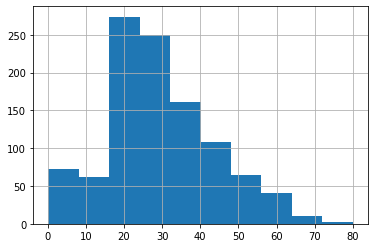

In [8]:
full.age.hist()

<AxesSubplot:ylabel='Density'>

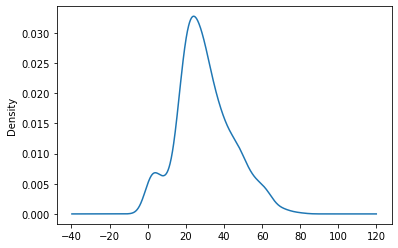

In [9]:
full.age.plot(kind='kde')

In [10]:
stats.shapiro(full.age.dropna())[1]

5.74782790807582e-11

sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

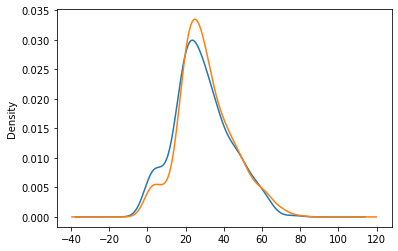

In [11]:
full.groupby('sex')['age'].plot(kind='kde')

# Qué tipos de datos tienen las variables?

In [12]:
full.dtypes

passenger_id      int64
survived        float64
p_class           int64
name             object
sex              object
age             float64
sib_sp            int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
dtype: object

In [13]:
full.sample(4)

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
726,727,1.0,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
176,177,0.0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
424,425,0.0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
187,188,1.0,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S


# ¿Cuál fue la proporción de sobrevivientes sobre el total?

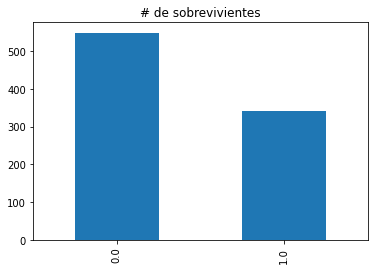

In [14]:
full.survived.value_counts().plot.bar(title='# de sobrevivientes');

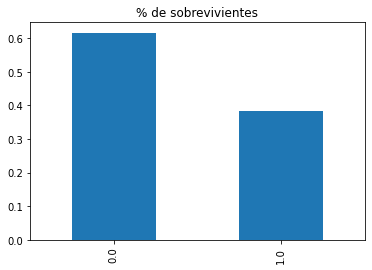

In [15]:
full.survived.value_counts(normalize=True).plot.bar(title='% de sobrevivientes');

# ¿Y si disociamos por clase?

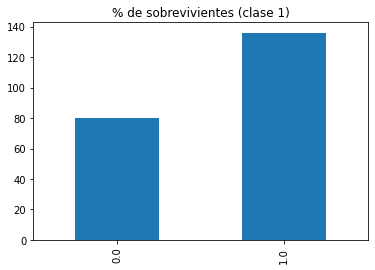

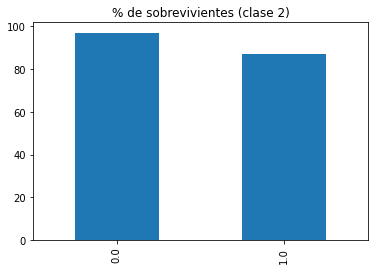

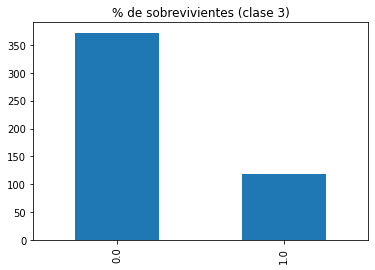

In [16]:
classes = full.p_class.unique()
classes.sort()

for c in classes:
    full[full.p_class == c].survived.value_counts().sort_index().plot.bar(title=f'% de sobrevivientes (clase {c})')
    plt.show()

# Mujeres y niños primero! ... mujeres y niños primero ?

## Mujeres

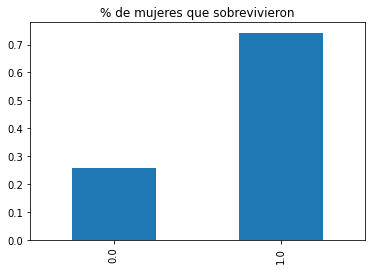

In [17]:
full[(full.sex == 'female')].survived.value_counts(normalize=True).sort_index().plot.bar(title='% de mujeres que sobrevivieron');

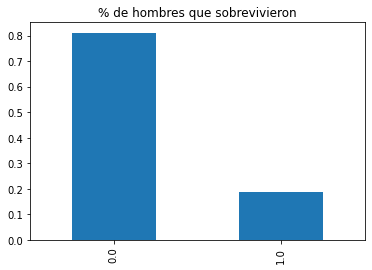

In [18]:
full[(full.sex == 'male')].survived.value_counts(normalize=True).sort_index().plot.bar(title='% de hombres que sobrevivieron');

## Niños

In [19]:
full['children'] = full.age <= 8

<AxesSubplot:title={'center':'% de niños que sobrevivieron'}>

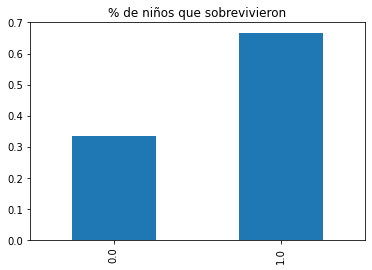

In [20]:
full[(full.children == True)].survived.value_counts(normalize=True).sort_index().plot.bar(title='% de niños que sobrevivieron')

<AxesSubplot:title={'center':'% de adultos que sobrevivieron'}>

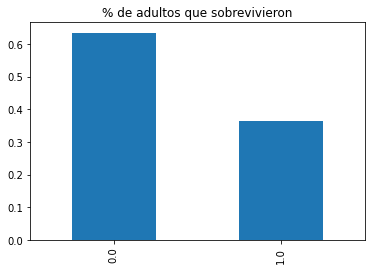

In [21]:
full[(full.children == False)].survived.value_counts(normalize=True).sort_index().plot.bar(title='% de adultos que sobrevivieron')

# ¿Existe alguna relación entre la clase del pasajero y sus probabilidades de sobrevivir?

<AxesSubplot:title={'center':'% de sobrevivientes por clase'}>

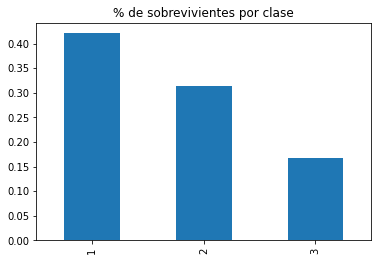

In [22]:
(full[full.survived == True].p_class.value_counts() / full.p_class.value_counts()).plot.bar(title='% de sobrevivientes por clase')

# ¿La cabina podría aportar algo de información?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png" />

In [23]:
full[full.cabin.notnull()].cabin.sample(3)

177           C116
484            B49
53     C23 C25 C27
Name: cabin, dtype: object

In [24]:
full['cabin_letter'] = full.cabin.str.strip().str[:1]

In [25]:
print('Porcentaje de valores nulos: {} %'.format(round(sum(full.cabin_letter.isnull()) / full.shape[0] * 100, 2)))

Porcentaje de valores nulos: 77.46 %


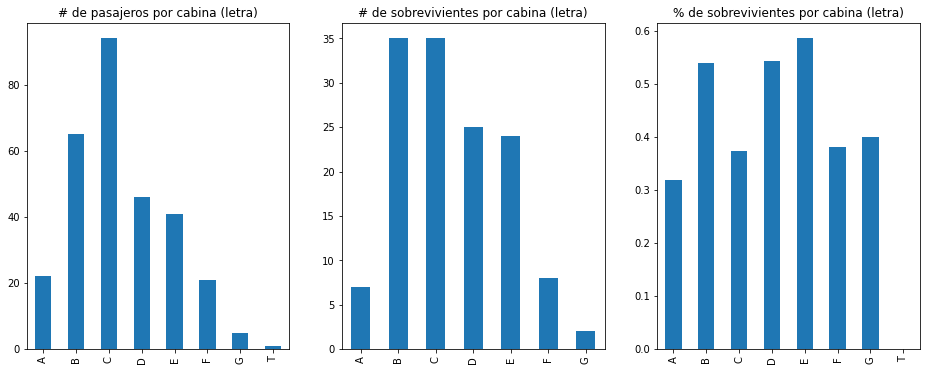

In [26]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
ax[0].set_title('# de pasajeros por cabina (letra)')
full.cabin_letter.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# de sobrevivientes por cabina (letra)')
full[full.survived == 1].cabin_letter.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% de sobrevivientes por cabina (letra)')
(full[full.survived == 1].cabin_letter.value_counts().sort_index() / 
 full.cabin_letter.value_counts().sort_index()).plot.bar(ax=ax[2]);

# ¿Podría existir una correlación entre el puerto de embarque y la probabilidad de sobrevivir?

C = Cherbourg, Q = Queenstown, S = Southampton

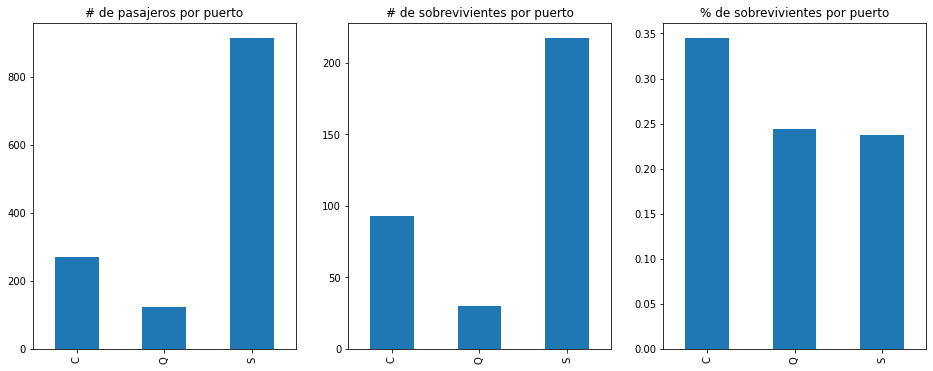

In [27]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))
plt.xticks(range(3), full[full.embarked.notnull()].embarked.unique())
ax[0].set_title('# de pasajeros por puerto')
full.embarked.value_counts().sort_index().plot.bar(ax=ax[0])
ax[1].set_title('# de sobrevivientes por puerto')
full[full.survived == True].embarked.value_counts().sort_index().plot.bar(ax=ax[1])
ax[2].set_title('% de sobrevivientes por puerto')
(full[full.survived == True].embarked.value_counts().sort_index() / full.embarked.value_counts().sort_index()).plot.bar(ax=ax[2]);

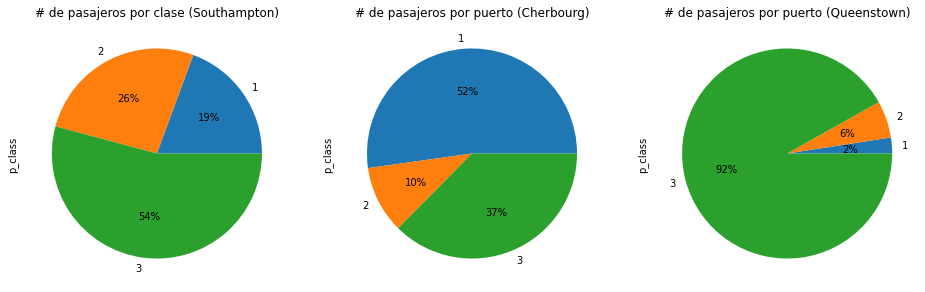

In [28]:
f, ax = plt.subplots(1, 3, figsize=(16, 6))

ax[0].set_title('# de pasajeros por clase (Southampton)')
full[full.embarked == 'S'].p_class.value_counts().sort_index().plot.pie(ax=ax[0], autopct='%1.0f%%')
ax[1].set_title('# de pasajeros por puerto (Cherbourg)')
full[full.embarked == 'C'].p_class.value_counts().sort_index().plot.pie(ax=ax[1], autopct='%1.0f%%')
ax[2].set_title('# de pasajeros por puerto (Queenstown)')
full[full.embarked == 'Q'].p_class.value_counts().sort_index().plot.pie(ax=ax[2], autopct='%1.0f%%');

# ¿Cuál es la distribución de precios por billete de acuerdo a la clase?

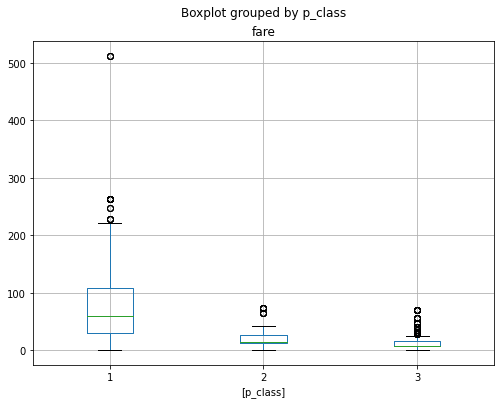

In [29]:
full[full.fare.notnull()][["p_class", "fare"]].boxplot(by='p_class', figsize=(8, 6));

# Existe alguna correlación entre el precio pagado y quienes sobrevivieron?

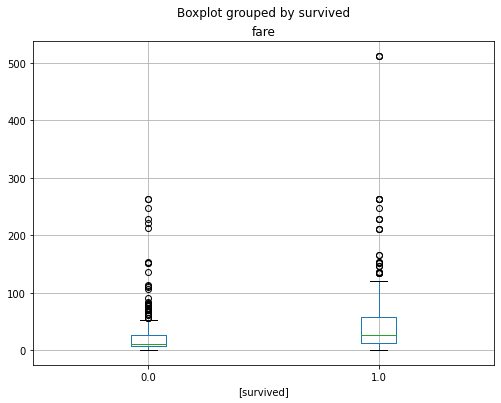

In [30]:
full[full.fare.notnull()][["survived", "fare"]].boxplot(by='survived', figsize=(8, 6));

# Correlaciones entre variables

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/400px-Correlation_examples2.svg.png" />

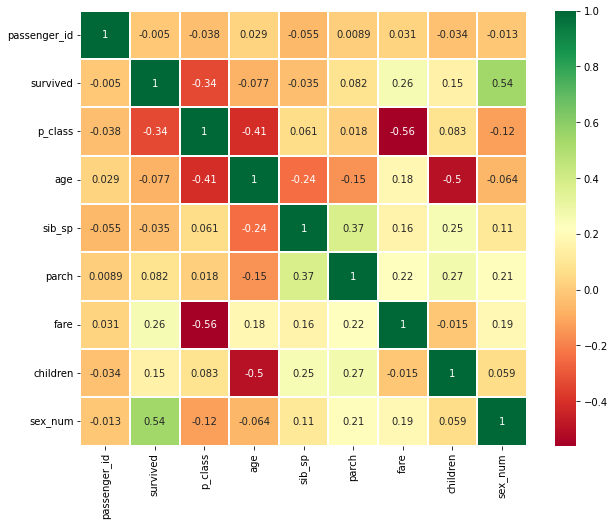

In [31]:
full["sex_num"] = full.sex.replace(['male', 'female'], [0, 1])
sns.heatmap(full.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()